## Building Neural networks from scratch


### importing dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt


### building a toy dataset

In [2]:
X = np.random.randn(2,50)
y = X[0,:] * 8 + X[1,:] * 5 + 3
X, y

(array([[ 0.57108364,  0.13498086, -0.13097946, -0.32297607, -0.37946309,
          0.69745694, -1.39811403, -0.23325348,  1.03581902,  0.5681919 ,
          1.09187353,  1.00240552, -0.39349346, -0.2611883 ,  1.32052951,
          1.00343655,  1.78296087,  0.11770731,  0.35153888,  1.77717177,
          1.16319357,  0.57624286,  1.41504509, -0.43269386,  0.98370602,
          0.40499526,  1.05554639, -0.97392671, -1.00031052,  3.11451477,
         -1.72265214, -0.91432879, -0.35825435,  0.67101982, -1.32176997,
          0.23842398, -0.64220993, -0.84216609,  0.5552938 ,  2.19849731,
         -1.32921873,  1.2480347 ,  0.48548864,  1.25171133,  0.19628714,
         -1.00091741, -0.05211224, -0.59412712,  0.33425323,  1.05873008],
        [-0.8330115 ,  0.88923608, -1.1932798 ,  0.48278674,  0.02329519,
          0.09871838,  0.5242889 ,  1.08225996,  0.08691801,  0.41341545,
          0.63616396, -1.36745814, -0.49529725, -0.25627302, -0.88381262,
          2.53703125,  1.30157023, -0

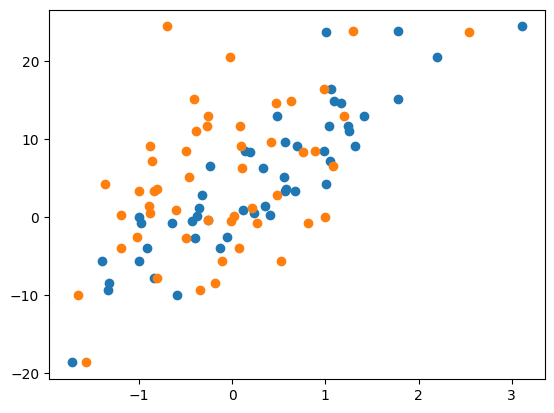

In [3]:
plt.scatter(x=X[0,:],y=y)
plt.scatter(x=X[1,:],y=y)

### Building neural network with one hidden layer

In [8]:
class Linear():
    def __init__(self, in_features, out_features):
        self.weights = np.random.randn(out_features, in_features)
        self.w_grad = np.zeros((out_features, in_features))
        self.bias = np.random.randn(out_features)
        self.b_grad = np.zeros(out_features)
        self.params = {"w = 
    def __call__(self, x):
        return self.weights @ np.transpose(X) + self.bias
    

SyntaxError: unterminated string literal (detected at line 7) (4011272880.py, line 7)

In [9]:
model = Linear(in_features=2, out_features=1)
model.grad()

NameError: name 'Linear' is not defined

In [4]:
def initialize_parameters(n_in, n_h, n_out):
    """
    initializes model parameters.

    Arguments:
    n_in: number of input units
    n_h: number of hidden units
    n_out: number of output units

    Return:
    parameters: dictionary of all the randomly intialized parameters
    
    """

    np.random.seed(42)

    W1 = np.random.rand(n_h, n_in)
    b1 = np.random.rand(n_h, 1)
    W2 = np.random.rand(n_out, n_h)
    b2 = np.random.rand(n_out, 1)

    parameters = {"W1":W1,
                  "b1":b1,
                  "W2":W2,
                  "b2":b2}
    
    return parameters

In [5]:
def forward_propagation(X, parameters):
    """
    Arguments:
    X: input data of shape (n_x, m)
    parameters: randomly initialized model parameters

    Return:
    A2 = sigmoid output of second activation
    cache = dictionary of Z1, A1, Z2 and A2
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Forward pass
    Z1 = W1 @ X
    A1 = np.tanh(Z1)
    Z2 = W2 @ A1
    A2 = Z2

    cache = {"Z1":Z1,
             "A1":A1,
             "Z2":Z2,
             "A2":A2}

    return A2, cache

In [6]:
def compute_loss(A2, Y):
    """
    compute Mean Squared Error loss of the model
    Arguments:
    A2: Prediction of the model
    Y: "true" label vactor of shape (1, number of samples)

    Return:
    loss: computed scalar loss of the model
    """

    m = len(Y)
    loss = 1/m * np.sum((A2 - Y) ** 2)
    return loss

In [7]:
def backward_propagation(parameters, cache, X, Y):
    """ computes gradient of the model parameters
    
    Arguments:
    parameters: dictionary of the parameters of the model
    cache: a dictionary containing Z1, A1, Z2 and A2
    X: input data of shape (2, number of example)
    Y: "true" label vector of shape (1, number of example)
    
    Return:
    grad: dictionary of the gradients of each model parameters
    """

    m = len(Y)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = cache["Z1"]
    A1 = cache["A1"]
    Z2 = cache["Z2"]
    A2 = cache["A2"]

    # Backpropagation
    dA2 = (2/m) * (A2 - Y) # (1, m)
    dZ2 = dA2 # (1,m)
    dW2 = dZ2 @ A1.T #(1, n_h)
    db2 = np.sum(dZ2, axis=1, keepdims=True) # (1,1)
    dA1 = W2.T @ dZ2 # (n_h, m)
    dZ1 = dA1 * (1 - np.power(A1,2)) # (n_h, m)
    dW1 = dZ1 @ X.T # (n_h, n_in)
    db1 = np.sum(dZ1, axis=1, keepdims=True) # (1, n_h)

    grads = {"dW1":dW1,
            "db1":db1,
            "dW2":dW2,
            "db2":db2}

    return grads

In [8]:
parameters = initialize_parameters(2, 4, 1)
parameters

{'W1': array([[0.37454012, 0.95071431],
        [0.73199394, 0.59865848],
        [0.15601864, 0.15599452],
        [0.05808361, 0.86617615]]),
 'b1': array([[0.60111501],
        [0.70807258],
        [0.02058449],
        [0.96990985]]),
 'W2': array([[0.83244264, 0.21233911, 0.18182497, 0.18340451]]),
 'b2': array([[0.30424224]])}

In [9]:
A2, cache = forward_propagation(X, parameters)
A2

array([[-0.56790779,  0.8616146 , -1.01172833,  0.35642126, -0.16458733,
         0.43859071, -0.10983034,  0.864306  ,  0.5636008 ,  0.66971824,
         0.96268319, -0.78290929, -0.67216942, -0.40144817, -0.28657247,
         1.30460482,  1.23814849, -0.56021679, -0.6977002 ,  0.38422849,
         0.88956678, -0.54590118,  0.38340322, -0.22811316, -0.04707838,
        -0.87211062, -0.38010823,  0.37618998,  0.52650114,  0.57873106,
        -1.26721182, -0.36588463,  0.05294815, -0.65890037, -0.73984973,
        -0.73183895, -0.03218254, -0.99206537, -0.22747622,  0.82903965,
        -0.85198448,  0.30482677,  1.08188836,  0.18303538,  0.79722704,
        -0.57177128, -0.90952675, -1.20364855,  0.28686831,  1.10074259]])

In [10]:
loss = compute_loss(A2, y)
loss

95.7754876108164

In [16]:
grads = backward_propagation(parameters=parameters, cache=cache, X=X, Y=y)
grads

{'dW1': array([[-8.8239632 ,  0.77842161],
        [-1.28060426,  0.04634611],
        [-3.00324943, -0.75014499],
        [-2.34906045, -0.07214227]]),
 'db1': array([[-5.04384103],
        [-0.99185244],
        [-1.58695616],
        [-1.23620723]]),
 'dW2': array([[ -7.14501972, -10.28641159,  -3.52044061,  -3.32794636]]),
 'db2': array([[-9.3472306]])}

In [12]:
def check_grads(parameters=parameters, grads=grads):
    """
    check the calculated gradients are correct
    """
    eps = 0.00000001
    # concatinated = []
    params_theta = {}
    for i in parameters:
        reshaped = np.reshape(parameters[i], parameters[i].shape[0]*parameters[i].shape[1])
        # concatinated.extend(reshaped)
        params_theta[i] = resh + eps
    theta_A2, theta_cache = forward_propagation(X, params_theta)
    loss = compute_loss(A2=theta_A2, Y=y)
    print(loss)
check_grads(parameters = parameters, grads=grads)

NameError: name 'resh' is not defined

In [25]:
## manual gradient check
## lets check the gradient calculation of W1[0][0]
## making a copy of parameters
import copy

check_params = copy.deepcopy(parameters)

## nudging the W[0][0] parameter by 0.00000001
check_params["W1"][0][0] = check_params["W1"][0][0] + 0.00000001

## forward pass and loss
check_A2, check_cache = forward_propagation(parameters=check_params, X=X)
check_loss = compute_loss(A2=check_A2, Y=y)

# manually computing gradient of parameter W[0][0]
gradient = (check_loss - loss)/ 0.00000001

print(f"Numerically approximated gradient of the parameter W[0][0] is:{gradient}")
print(f"Gradient of W[0][0] calculated by backprop: {grads['dW1'][0][0]}")
print(gradient - grads['dW1'][0][0])

Numerically approximated gradient of the parameter W[0][0] is:-8.823963071336038
Gradient of W[0][0] calculated by backprop: -8.823963198010127
1.2667408810784764e-07


In [ ]:
parameters

In [ ]:
loss, check_loss